#Logistic Regression

In [2]:
import numpy as np  
from matplotlib import pyplot as plt  
import pandas as pd  
import seaborn as sns  
import sklearn. metrics as metrics

C:\Users\91830\AppData\Local\Temp\ipykernel_14620\3963968305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
Default = pd.read_csv("C:\\Users\\91830\\OneDrive\\Desktop\\Pandas\\IPL.csv")
Default.head

<bound method NDFrame.head of                          Teams   M   W  L  T  N/R  PT    NRR         For  \
0               Gujarat titans  14  10  4  0    0  20  0.809  2450/268.1   
1         Lucknow super gaints  14   8  5  0    1  17  0.652  2369/254.3   
2               Mumbai Indians  14   8  5  0    1  17  0.284  2253/255.2   
3             Rajisthan Royals  14   8  6  0    0  16 -0.044  2592/270.3   
4  Royal challengers Bangalore  14   7  7  0    0  14  0.148  2419/272.1   
5        Kolkata knight riders  14   7  7  0    0  14  0.135  2502/275.4   
6                 Punjab kings  14   6  8  0    0  12 -0.239  2463/274.3   
7               Delhi capitals  14   6  8  0    0  12 -0.304  2518/275.3   
8          Sunrisers Hyderabad  14   5  9  0    0  10 -0.080  2182/276.0   

      Against parse_dates  
0  2326/279.2      01-Dec  
1  2232/257.5      02-Dec  
2  2216/259.3      03-Dec  
3  2620/272.1      04-Dec  
4  2389/273.2      05-Dec  
5  2435/272.2      06-Dec  
6  2432/264.0

In [4]:
Default.shape

(9, 11)

In [5]:
Default.describe()

,M,W,L,T,N/R,PT,NRR
count,9.0,9.000000,9.000000,9.0,9.000000,9.000000,9.000000
mean,14.0,7.222222,6.555556,0.0,0.222222,14.666667,0.151222
std,0.0,1.481366,1.666667,0.0,0.440959,3.122499,0.379544
min,14.0,5.000000,4.000000,0.0,0.000000,10.000000,-0.304000
25%,14.0,6.000000,5.000000,0.0,0.000000,12.000000,-0.080000
50%,14.0,7.000000,7.000000,0.0,0.000000,14.000000,0.135000
75%,14.0,8.000000,8.000000,0.0,0.000000,17.000000,0.284000
max,14.0,10.000000,9.000000,0.0,1.000000,20.000000,0.809000


<Axes: ylabel='PT'>

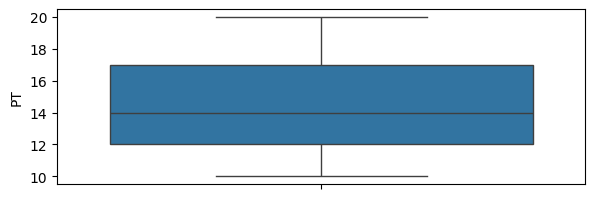

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(2,2,1)
sns.boxplot(y = Default ['PT'])

<Axes: ylabel='NRR'>

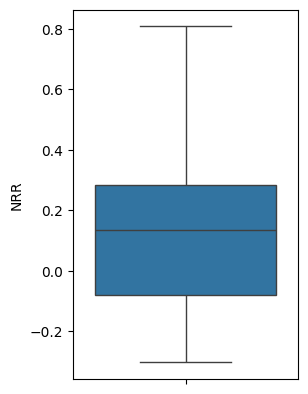

In [7]:
plt.subplot(1,2,2)
sns.boxplot(y = Default['NRR'])

<Axes: ylabel='count'>

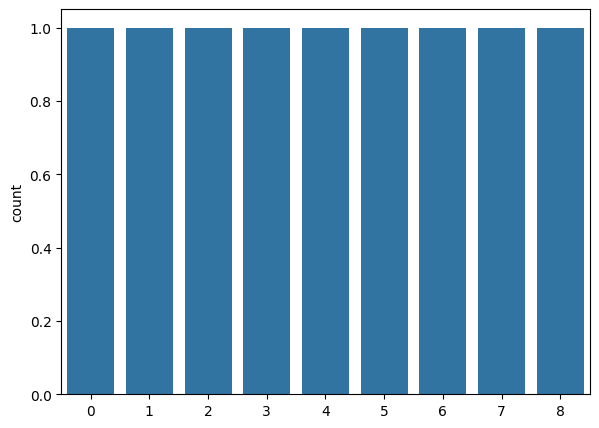

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(Default['T'])

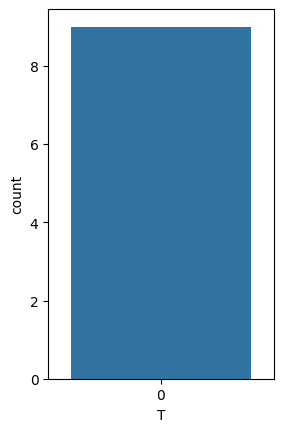

In [11]:
plt.subplot(1,2,2)
sns.countplot(x = Default['T'])
plt.show()

In [47]:
Default["M"].value_counts()

M
14    9
Name: count, dtype: int64

In [54]:
Default["T"].value_counts()

T
0    9
Name: count, dtype: int64

In [55]:
Default["L"].value_counts(normalize = True)

L
5    0.222222
7    0.222222
8    0.222222
4    0.111111
6    0.111111
9    0.111111
Name: proportion, dtype: float64

In [59]:
Default["T"].value_counts(normalize = True)

T
0    1.0
Name: proportion, dtype: float64

<Axes: xlabel='M', ylabel='PT'>

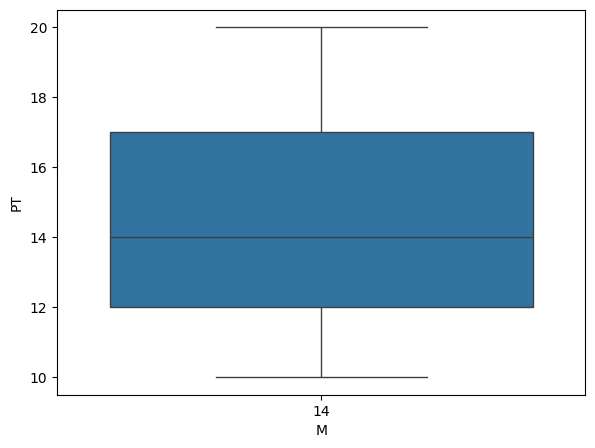

In [78]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y =Default["PT"],x = Default["M"])

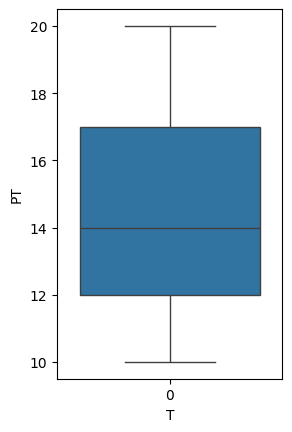

In [81]:
plt.subplot(1,2,2)
sns.boxplot(x= Default['T'], y =Default['PT'])
plt.show()

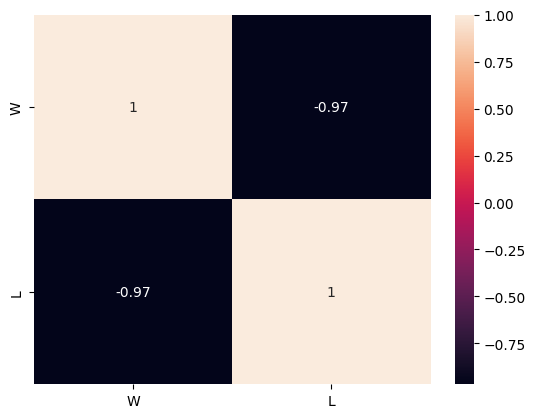

In [90]:
pd.crosstab( Default['Teams'], Default['M'],normalize = 'index').round(2)
sns.heatmap(Default[['W','L']].corr(), annot =True)
plt.show()

In [91]:
Default.isnull().sum()

Teams          0
M              0
W              0
L              0
T              0
N/R            0
PT             0
NRR            0
For            0
Against        0
parse_dates    0
dtype: int64

In [97]:
Q1,Q3 = Default['NRR'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

LL

-0.626

In [101]:
df = Default[Default['NRR']>LL]

df

,Teams,M,W,L,T,N/R,PT,NRR,For,Against,parse_dates
0,Gujarat titans,14,10,4,0,0,20,0.809,2450/268.1,2326/279.2,01-Dec
1,Lucknow super gaints,14,8,5,0,1,17,0.652,2369/254.3,2232/257.5,02-Dec
2,Mumbai Indians,14,8,5,0,1,17,0.284,2253/255.2,2216/259.3,03-Dec
3,Rajisthan Royals,14,8,6,0,0,16,-0.044,2592/270.3,2620/272.1,04-Dec
4,Royal challengers Bangalore,14,7,7,0,0,14,0.148,2419/272.1,2389/273.2,05-Dec
5,Kolkata knight riders,14,7,7,0,0,14,0.135,2502/275.4,2435/272.2,06-Dec
6,Punjab kings,14,6,8,0,0,12,-0.239,2463/274.3,2432/264.0,07-Dec
7,Delhi capitals,14,6,8,0,0,12,-0.304,2518/275.3,2564/271.3,08-Dec
8,Sunrisers Hyderabad,14,5,9,0,0,10,-0.080,2182/276.0,2424/278.1,09-Dec


In [106]:
df['W'].value_counts(normalize = True)

W
8     0.333333
7     0.222222
6     0.222222
10    0.111111
5     0.111111
Name: proportion, dtype: float64

In [108]:
df['L'].value_counts()

L
5    2
7    2
8    2
4    1
6    1
9    1
Name: count, dtype: int64

In [113]:
Default['N/R'] = np.where(Default['PT']> UL,LL,Default['L'])


<Axes: ylabel='PT'>

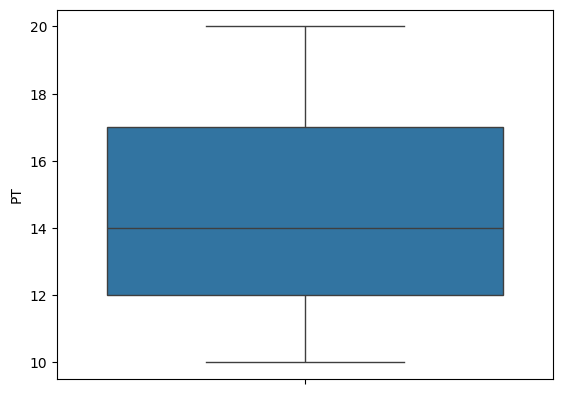

In [114]:
sns.boxplot(y= Default['PT'])

In [117]:
Default = pd.get_dummies(Default, drop_first = True)
Default.head()

,M,W,L,T,N/R,PT,NRR,Teams_Gujarat titans,Teams_Kolkata knight riders,Teams_Lucknow super gaints,...,Against_2564/271.3,Against_2620/272.1,parse_dates_02-Dec,parse_dates_03-Dec,parse_dates_04-Dec,parse_dates_05-Dec,parse_dates_06-Dec,parse_dates_07-Dec,parse_dates_08-Dec,parse_dates_09-Dec
0,14,10,4,0,-0.626,20,0.809,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,14,8,5,0,-0.626,17,0.652,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2,14,8,5,0,-0.626,17,0.284,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,14,8,6,0,-0.626,16,-0.044,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,14,7,7,0,-0.626,14,0.148,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [128]:
Default.column =['M','W','L','T']

In [129]:
from sklearn.model_selection import train_test_split

In [157]:
x = Default.drop('L', axis =1)
y = Default['M']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3 , random_state = 21, stratify = y)

In [136]:
print(x_train.shape)

(6, 38)


In [137]:
print(x_test.shape)

(3, 38)


In [16]:
print(y_train.values_counts(normalise = True).round(2))


NameError: name 'y_train' is not defined

In [159]:
print(y_test.value_counts(normalize = True).round(2))

M
14    1.0
Name: proportion, dtype: float64
